# Instrumentation Design 1
## Lab 9 - RC-Circuits

Lab report by Matt Rixman

### 1. RC Time Constants

Objective 1: To determine experimentally the time it takes a capacitor to charge through a resistance

Objective 2: To determine experimentally the time it takes a capacitor to discharge through a resistance

#### A. Discharging of a Capacitor

1-11. The circuit in figure 1.5 was built.  The following measurements show how long the capacitor took to charge:

In [1]:
# nothing to see here
import pandas as pd
from si_prefix import si_format
from IPython.display import display
from sympy import symbols, Eq

def display_frame(frame, hide_columns=None):
    display(frame.applymap(lambda x: si_format(x, precision=2) if type(x) in [int, float] else x))
    

change_after = [0, .632, .865, .950, .982, .993, 1]

columns = ["seconds", "trial 1 (V)", "trial 2 (V)", "trial 3 (V)"]
discharge = pd.DataFrame.from_dict({
    1: [10, 4, 4.24, 4.26],
    2: [20, 1.9, 1.85, 1.86],
    3: [30, 0.87, 0.86, 0.86],
    4: [40, .458, .412, .415 ],
    5: [50, .207, .193, .193],
    12: [120, .047, .039, .037],
}, orient='index', columns=columns)
discharge["average (V)"] = discharge.apply(lambda x: sum(x[trial] for trial in columns[1:])/3, axis=1)

display_frame(discharge)

,seconds,trial 1 (V),trial 2 (V),trial 3 (V),average (V)
1,10.00,4.00,4.24,4.26,4.17
2,20.00,1.90,1.85,1.86,1.87
3,30.00,870.00 m,860.00 m,860.00 m,863.33 m
4,40.00,458.00 m,412.00 m,415.00 m,428.33 m
5,50.00,207.00 m,193.00 m,193.00 m,197.67 m
12,120.00,47.00 m,39.00 m,37.00 m,41.00 m


12. Calculations below

In [2]:
r = 1e6
ps_volts = 11
voltmeter_ohms = 10 / (ps_volts - 10) * r
print('Voltmeter internal resistance:', si_format(voltmeter_ohms), 'Ω')

Voltmeter internal resistance: 10.0 M Ω


In [3]:
cap_farads = 1e-6
rc_seconds = cap_farads * voltmeter_ohms
print('RC time constant:', rc_seconds, 's')

RC time constant: 10.0 s


In [4]:
discharge['p'] = discharge.apply(
    lambda x: 1 - change_after[min(int(x["seconds"] / rc_seconds), 6)],
    axis=1)
discharge['capacity remaining (%)'] = discharge.apply(
    lambda x: "{:.2f}".format(100 * x['p']),
    axis=1)
discharge['calculated (V)'] = discharge.apply(
    lambda x: x["p"] * 10,
    axis=1)
discharge.pop('p')
display_frame(discharge)

,seconds,trial 1 (V),trial 2 (V),trial 3 (V),average (V),capacity remaining (%),calculated (V)
1,10.00,4.00,4.24,4.26,4.17,36.80,3.68
2,20.00,1.90,1.85,1.86,1.87,13.50,1.35
3,30.00,870.00 m,860.00 m,860.00 m,863.33 m,5.00,500.00 m
4,40.00,458.00 m,412.00 m,415.00 m,428.33 m,1.80,180.00 m
5,50.00,207.00 m,193.00 m,193.00 m,197.67 m,0.70,70.00 m
12,120.00,47.00 m,39.00 m,37.00 m,41.00 m,0.00,0.00


13. Our calculated values were consistently lower than our measured values.  I'm not sure what caused this.

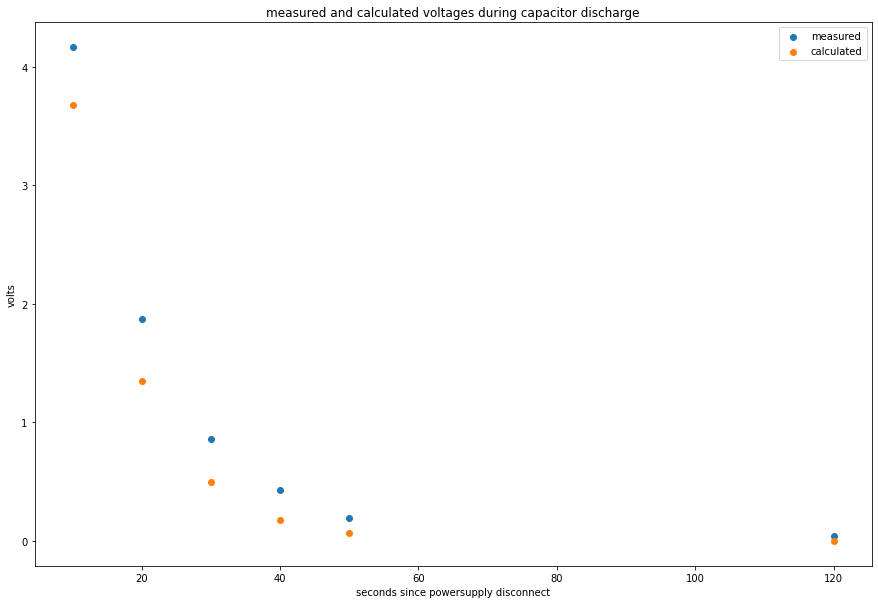

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
ax = fig.add_subplot()
ax.set_title("measured and calculated voltages during capacitor discharge")
ax.set_ylabel("volts")
ax.set_xlabel("seconds since powersupply disconnect")
ax.scatter(discharge['seconds'], discharge['average (V)'], label='measured')
ax.scatter(discharge['seconds'], discharge['calculated (V)'], label='calculated')
plt.legend(loc='upper right')
plt.show()

#### B. Charging of a Capacitor

1-11. The circuit in figure 1.6 was built.  The following measurements show how long it took to charge:

In [6]:
charge = pd.DataFrame.from_dict({
    1: [10, 5.822, 5.12, 6.102],
    2: [20, 8.202, 8.202, 8.199],
    3: [30, 9.209, 9.207, 9.192],
    4: [40, 9.602, 9.605, 9.600],
    5: [50, 9.844, 9.846, 9.846],
    12: [120, 10.014, 10.015, 10.018],
}, orient='index', columns=columns)
charge["average (V)"] = charge.apply(lambda x: sum(x[trial] for trial in columns[1:])/3, axis=1)

display_frame(charge)

,seconds,trial 1 (V),trial 2 (V),trial 3 (V),average (V)
1,10.00,5.82,5.12,6.10,5.68
2,20.00,8.20,8.20,8.20,8.20
3,30.00,9.21,9.21,9.19,9.20
4,40.00,9.60,9.61,9.60,9.60
5,50.00,9.84,9.85,9.85,9.85
12,120.00,10.01,10.02,10.02,10.02


10. Calculations Below

In [7]:
charge['p'] = charge.apply(
    lambda x: change_after[min(int(x["seconds"] / rc_seconds), 6)],
    axis=1)
charge['charged (%)'] = charge.apply(
    lambda x: "{:.2f}".format(100 * x['p']),
    axis=1)
charge['calculated (V)'] = charge.apply(
    lambda x: x["p"] * 10,
    axis=1)
charge.pop('p')
display_frame(charge)

,seconds,trial 1 (V),trial 2 (V),trial 3 (V),average (V),charged (%),calculated (V)
1,10.00,5.82,5.12,6.10,5.68,63.20,6.32
2,20.00,8.20,8.20,8.20,8.20,86.50,8.65
3,30.00,9.21,9.21,9.19,9.20,95.00,9.50
4,40.00,9.60,9.61,9.60,9.60,98.20,9.82
5,50.00,9.84,9.85,9.85,9.85,99.30,9.93
12,120.00,10.01,10.02,10.02,10.02,100.00,10.00


11. Our calculated values were consistently higher than our measured values.  I'm not sure what caused this.

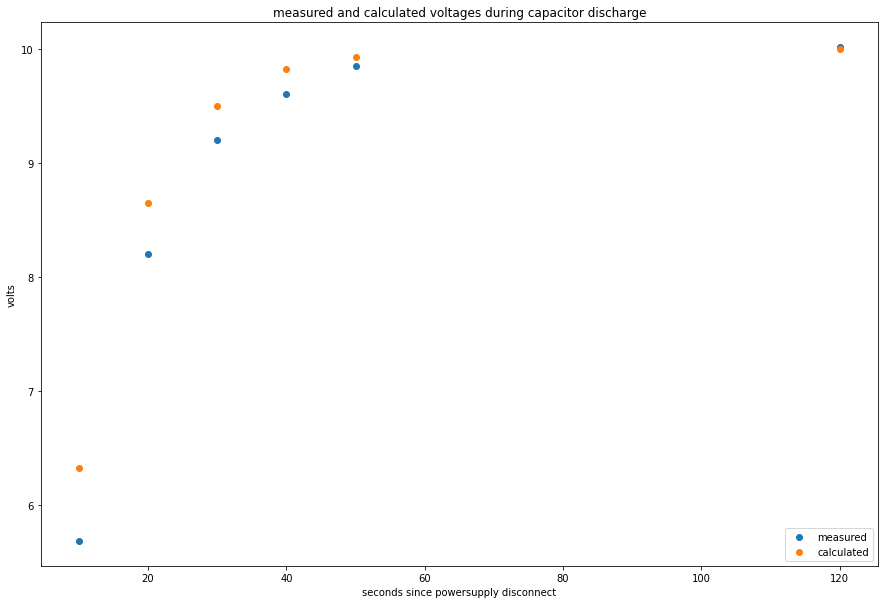

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
ax = fig.add_subplot()
ax.set_title("measured and calculated voltages during capacitor discharge")
ax.set_ylabel("volts")
ax.set_xlabel("seconds since powersupply disconnect")
ax.scatter(charge['seconds'], charge['average (V)'], label='measured')
ax.scatter(charge['seconds'], charge['calculated (V)'], label='calculated')
plt.legend(loc='lower right')
plt.show()

#### C. Square-Wave Input

The circuit in figure 1.7 was connected to a function generator providing a 5V<sub>pp</sub> square-wave at 50 Hz.

1-3. The given components resulted in a 2ms time constant

In [9]:
cap_farads = 1e-7
resistor_ohms = 2e3
rc_seconds = cap_farads * resistor_ohms
print('RC time constant:', si_format(rc_seconds), 's')

RC time constant: 200.0 µ s


4-5. Calculations and measurements below

In [10]:
square = pd.DataFrame([1, 2, 3, 4, 5], columns=["Time Constants"])
square["Time"] = square.apply(lambda x: "{} ms".format(x["Time Constants"] * 2), axis=1)
square["p"] = square.apply(lambda x: change_after[int(x["Time Constants"])], axis=1)
square["% Change"] = square.apply(lambda x: "{:.2f}".format(x["p"]), axis=1)

# Voltage ✕  
square["V_c Calculated"] = square.apply(lambda x: x["p"] * 5, axis=1)


square["V_c Measured"] = [3.20, 4.32, 4.72, 4.96, 5.04]

square.pop("p")
display_frame(square)

,Time Constants,Time,% Change,V_c Calculated,V_c Measured
0,1.00,2 ms,0.63,3.16,3.20
1,2.00,4 ms,0.86,4.33,4.32
2,3.00,6 ms,0.95,4.75,4.72
3,4.00,8 ms,0.98,4.91,4.96
4,5.00,10 ms,0.99,4.96,5.04


### 2. Reactance of a Capacitor

Objective 1: To verify experimentally the formula for capacitive reactance $X_c = \frac{1}{2 \pi f C}$

1-4. Given a 0.47µF capacitor, in a circuit like figure 2.3, The following values were measured at different voltages (all 50 Hz)

In [11]:
columns = ["V_c (V)", "I_c (A)", "Xc_ohms_law (Ω)"]
reactance = pd.DataFrame.from_dict({
    5: [1.78, 423e-6, 4.2e3],
    10: [3.45, 823e-6, 4.18e3],
    15: [5.14, 1.25e-3, 4.12e3],
}, orient='index', columns=columns)
display_frame(reactance)

,V_c (V),I_c (A),Xc_ohms_law (Ω)
5,1.78,423.00 µ,4.20 k
10,3.45,823.00 µ,4.18 k
15,5.14,1.25 m,4.12 k


5. The following reactance was calculated:

In [12]:
f = 50
c = 0.47e-6
pi = 3.14159
xc = 1 / (2 * pi * f * c)
print(si_format(xc), "Ω")

6.8 k Ω


I don't know why this value doesn't match the measured ones above, The same capacitor was used in later sections where measured and calculated values matched, so I don't think it's faulty.  The discrepancy would be explained if perhaps we had bumped the frequency knob at some point and it was actually set to 80Hz.

In [13]:
f = 80
c = 0.47e-6
pi = 3.14159
xc = 1 / (2 * pi * f * c)
print(si_format(xc), "Ω")

4.2 k Ω



6-7. Using a 5.6kΩ resistor and a 1µF capacitor, the circuit in figured 2.4 was connected to 1 V (rms) of AC power.  

In [14]:
columns = ["V_p2p_c (V)", "V_p2p_r (V)"]
reactance = pd.DataFrame.from_dict({
    1: [1.44, 2.64],
}, orient='index', columns=columns)
reactance["Xc_ohms_law (Ω)"] = reactance.apply(lambda x: (x[columns[0]] / x[columns[1]]) * 5.6e3, axis=1)

display_frame(reactance)

,V_p2p_c (V),V_p2p_r (V),Xc_ohms_law (Ω)
1,1.44,2.64,3.05 k


8. The following reactance was caclulated:

In [15]:
f = 50
c = 1e-6
pi = 3.14159
xc = 1 / (2 * pi * f * c)
print(si_format(xc), "Ω")

3.2 k Ω


### 3. Capacitors in Series and Parallel

Objective 1: To verify experimentally that the total capacitance  $C_T$ of capacitors connected in series is:
$$
\frac{1}{C_T} = \frac{1}{C_1} + \frac{1}{C_2} ... \frac{1}{C_n}
$$

Objective 2: To verify experimentally that the total capacitance  $C_T$ of capacitors connected in parallel is:
$$
C_T = C_1 + C_2 ... C_n
$$

#### A. Series

1. The circuit in figure 3.3 was assembled.  The available capacitors were:

In [16]:
c4 = 1e-6 # farads
c5 = 0.47e-6

2-3. First, c5 was omitted from the circuit, so only c6 was included.  Voltage was applied and voltages were measured across each component

In [17]:
v_generated = 5 # volts (rms) AC @ 200 Hz
v_c1 = 144e-3
v_r = 1.75
R = 10e3        # ohms

4. The current and reactance was caclutated:

In [18]:
def current(voltage):
    return voltage / R

def reactance(V_c, I):
    return V_c / I
 
i_c1 = current(v_r)
print(si_format(i_c1), "A")

x_c1 = reactance(v_c1, i_c1)
print(si_format(x_c1), "Ω")


175.0 µ A
822.9  Ω


5. The above steps were repeated, this time with only c2 in the circuit.

In [19]:
v_c2 = 203.4e-3  # volts
v_r = 1.74
i_c2 = current(v_r)
print("I_c2 =", si_format(i_c2), "A")

x_c2 = reactance(v_c2, i_c2)
print("X_c2 =", si_format(x_c2), "Ω")


I_c2 = 174.0 µ A
X_c2 = 1.2 k Ω


6. Then we repeat one more, this time with both capacitors included

In [20]:
v_both = 341.5e-3  # volts
v_r = 1.71
i_both = current(v_r)
print("I_both =", si_format(i_both), "A")

x_both = reactance(v_both, i_both)
print("X_both =", si_format(x_both), "Ω")

I_both = 171.0 µ A
X_both = 2.0 k Ω


We have found experimentally that
$$
X_{cboth} = X_{c1} + X_{c2}
$$

Substituting gives
$$
\frac{1}{2 \pi f C_{both}}  = \frac{1}{2 \pi f C_{1}} + \frac{1}{2 \pi f C_{2}}
$$

Remove a common factor of $\frac{1}{2 \pi f}$ and you get
$$
\frac{1}{C_{both}} = \frac{1}{C_1} + \frac{1}{C_2}
$$

...which is what we were looking to confirm.

#### B. Parallel

1. The circuit in figure 3.4 was assembled with the same components from the previous section

2. Again at 5V (rms) AC @ 200Hz, current was applied, and the following measurements were taken:

In [21]:
v_cboth = 1.75    # volts
i_both = 3.22e-3  # amps

3. Given these measurements, the reactance of the two parallel capacitors is:

In [22]:
x_both = reactance(v_cboth, i_both)
print("X_both=", si_format(x_both, precision=2), "Ω")

X_both= 543.48  Ω


In [23]:
def reactance_to_capacitance(x, freq):
    return 1 / (2 * 3.14159 * freq * x)
c_both = reactance_to_capacitance(x_both, 200)
print("C_both_measured =", si_format(c_both, precision=2), 'F')

C_both_measured = 1.46 µ F


In [24]:
print("C_both_theoretical =", si_format(c4 + c5, precision=2))

C_both_theoretical = 1.47 µ


4. Adding a third capacitor gives the following:

In [25]:
c3 = 1e-6         # farads 
v_cthree = 1.72    # volts
i_three = 5.31e-3  # amps

5. Which gives:

In [26]:
x_three = reactance(v_cthree, i_three)
print("X_three = ", si_format(x_three, precision=2), "Ω")
c_three = reactance_to_capacitance(x_three, 200)
print("C_three_measured =", si_format(c_three, precision=2))

X_three =  323.92  Ω
C_three_measured = 2.46 µ


In [27]:
print("C_three_theoretical =", si_format(c3 + c4 + c5, precision=2))

C_three_theoretical = 2.47 µ


Our theoretical and measured values match closely. 

### 4. The Capacitive Voltage Divider

Objective 1: To show that the voltage $V_1$ across a capacitor C1 in a series-connected capacitive voltage divider is given by the formula
$$
V_1 = V \frac{C_T}{C_1}
$$
where V is the voltage applied across all of the capacitors and $C_T$ is the total capacitance of the series-connected capacitors.

Objective 2: To verify experimentally the formula above

1. The following capacitors were used in a circuit like figure 4.2

In [28]:
c1 = c2 = c3 = 1e-6  # farads
c4 = 0.47e-6
v = 1.76 # volts

2-8. 6V of AC current was applied at 200Hz, the following measurements were made

In [29]:
c12 = {"c1" : (c1, 868e-3), "c2": (c2, 874e-3)}  # { label: (farads, volts) }
c123 = {"c1": (c1, 591e-3), "c2": (c2, 595e-3), "c3": (c3, 558e-3)}
c234 = {"c2": (c2, 520e-3), "c3": (c3, 488e-3), "c4": (c4, 733e-3)}


def analyze(arrangement, description):
    print(description)
    total_cap = 1 /sum([1 / x[0] for x in arrangement.values()])
    print(f"total capacitance: {si_format(total_cap, precision=2)}F")
    for name, (cap, volt) in arrangement.items():
        calc = si_format(v * (total_cap / cap), precision=2)
        print(f"    across {name} ({si_format(cap, precision=2)}F): {volt}V was measured, {calc}V was calculated")
    print()
    
analyze(c12, "two capacitors, both 1µF")    
analyze(c123, "three capacitors, all 1µF")
analyze(c234, "three capacitors, two 1µF, one 0.47µF")    



two capacitors, both 1µF
total capacitance: 500.00 nF
    across c1 (1.00 µF): 0.868V was measured, 880.00 mV was calculated
    across c2 (1.00 µF): 0.874V was measured, 880.00 mV was calculated

three capacitors, all 1µF
total capacitance: 333.33 nF
    across c1 (1.00 µF): 0.591V was measured, 586.67 mV was calculated
    across c2 (1.00 µF): 0.595V was measured, 586.67 mV was calculated
    across c3 (1.00 µF): 0.558V was measured, 586.67 mV was calculated

three capacitors, two 1µF, one 0.47µF
total capacitance: 242.27 nF
    across c2 (1.00 µF): 0.52V was measured, 426.39 mV was calculated
    across c3 (1.00 µF): 0.488V was measured, 426.39 mV was calculated
    across c4 (470.00 nF): 0.733V was measured, 907.22 mV was calculated

